<a href="https://colab.research.google.com/github/sugi-san/others/blob/main/video_matting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

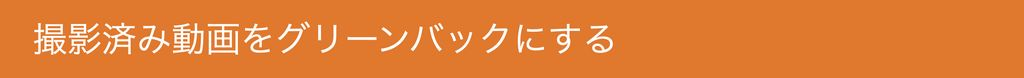
![Teaser](https://raw.githubusercontent.com/PeterL1n/RobustVideoMatting/master/documentation/image/teaser.gif)

In [ ]:
#@title 1.セットアップ（３分程度かかります）
# pytorchバージョン変更
! pip install torch==1.8.0 torchvision==0.9.0

# ライブラリー・インストール
! pip install --quiet av pims

# モデル構築
import torch
model = torch.hub.load("PeterL1n/RobustVideoMatting", "mobilenetv3").cuda() # or "resnet50"
convert_video = torch.hub.load("PeterL1n/RobustVideoMatting", "converter")

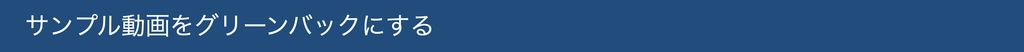

In [ ]:
#@title 2.サンプル動画のダウンロード
! pip install --upgrade gdown 
import gdown
gdown.download('https://drive.google.com/uc?id=1qWMWdgNLLYSbe9d0P-Gnpa-MDbeT-sUR', './input.mp4', quiet=False)


In [ ]:
#@title 3.動画の再生（変換前）
# mp4動画の再生
from IPython.display import HTML
from base64 import b64encode

mp4 = open('./input.mp4', 'rb').read()
data_url = 'data:video/mp4;base64,' + b64encode(mp4).decode()
HTML(f"""
<video width="70%" height="70%" controls>
      <source src="{data_url}" type="video/mp4">
</video>""")

In [ ]:
#@title 4.動画をグリーンバックに変換
convert_video(
    model,                           # The loaded model, can be on any device (cpu or cuda).
    input_source='input.mp4',        # A video file or an image sequence directory.
    downsample_ratio=None,           # [Optional] If None, make downsampled max size be 512px.
    output_type='video',             # Choose "video" or "png_sequence"
    output_composition='com.mp4',    # File path if video; directory path if png sequence.
    output_alpha="pha.mp4",          # [Optional] Output the raw alpha prediction.
    output_foreground="fgr.mp4",     # [Optional] Output the raw foreground prediction.
    output_video_mbps=4,             # Output video mbps. Not needed for png sequence.
    seq_chunk=12,                    # Process n frames at once for better parallelism.
    num_workers=1,                   # Only for image sequence input. Reader threads.
    progress=True                    # Print conversion progress.
)

In [ ]:
#@title 5.動画の再生（変換後）
# mp4動画の再生
from IPython.display import HTML
from base64 import b64encode

mp4 = open('./com.mp4', 'rb').read()
data_url = 'data:video/mp4;base64,' + b64encode(mp4).decode()
HTML(f"""
<video width="70%" height="70%" controls>
      <source src="{data_url}" type="video/mp4">
</video>""")

In [ ]:
#@title 6.動画のダウンロード
from google.colab import files
files.download('com.mp4')

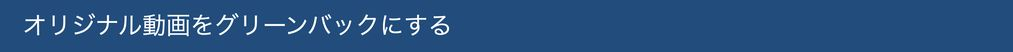

In [ ]:
#@title 7.PCから動画をアップロード
#@markdown ・動画は60秒以内、10MB以下を目安にして下さい\
import os
from google.colab import files

uploaded = files.upload()           # Use colab upload dialog.
uploaded = list(uploaded.keys())    # Get uploaded filenames.
assert len(uploaded) == 1           # Make sure only uploaded one file.
os.rename(uploaded[0], 'input.mp4') # Rename file to "input.mp4".

In [ ]:
#@title 8.動画をグリーンバックに変換
#@markdown ・HD（1280×720）60秒の動画で変換に約9分かかります\
#@markdown ・フルHD（1920×1080）60秒の動画で変換に約15分かかります

convert_video(
    model,                           # The loaded model, can be on any device (cpu or cuda).
    input_source='input.mp4',        # A video file or an image sequence directory.
    downsample_ratio=None,           # [Optional] If None, make downsampled max size be 512px.
    output_type='video',             # Choose "video" or "png_sequence"
    output_composition='com.mp4',    # File path if video; directory path if png sequence.
    output_alpha="pha.mp4",          # [Optional] Output the raw alpha prediction.
    output_foreground="fgr.mp4",     # [Optional] Output the raw foreground prediction.
    output_video_mbps=4,             # Output video mbps. Not needed for png sequence.
    seq_chunk=12,                    # Process n frames at once for better parallelism.
    num_workers=1,                   # Only for image sequence input. Reader threads.
    progress=True                    # Print conversion progress.
)

In [ ]:
#@title 9.動画のダウンロード
from google.colab import files
files.download('com.mp4')

##【備考】
・「8.動画をグリーンバックに変換」で、青いバーの進捗率の「数字」が1分経っても変化がない場合は、黒丸を一回だけクリックして下さい。しばらくするとエラーで停止しますので、再度黒丸をクリックすると今度は上手く行く時があります。\
\
・動作がおかしくなった場合は、右上にある「ランタイム／ランタイムを出荷時設定にリセット」をクリックして、再度１番から順番に操作を行います。\
\
・このノートを実行して閉じてから、すぐ再度実行する場合は、前の記憶が不完全に残っていて上手く動かないことがあります。その場合は、右上にある「ランタイム／ランタイムを出荷時設定にリセット」をクリックして、再度１番から操作を行います。\
\
・長時間使用するとgoogleから使用制限を受ける場合がありますが、12h〜24h程度経つと使用制限が解除されます。\